# **Air Quality index analysis during covid lockdown 2022 Using python**
- Data here is based on (CPCB - India Central Pollution Control Board) as well as the World Air Quality Index Project.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Realtime pollution analysis**

In [4]:
import requests

In [6]:
city = 'Delhi'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '73bf898bb38cfa9434c466cba672e30379fc5da0'
main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 112,
 'attributions': [{'name': 'World Meteorological Organization - surface synoptic observations (WMO-SYNOP)',
   'url': 'http://worldweather.wmo.int'},
  {'logo': 'US-StateDepartment.png',
   'name': "U.S. Embassy and Consulates' Air Quality Monitor in India",
   'url': 'https://in.usembassy.gov/embassy-consulates/new-delhi/air-quality-data/'},
  {'name': 'World Air Quality Index Project', 'url': 'https://waqi.info/'}],
 'city': {'geo': [28.63576, 77.22445],
  'name': 'New Delhi US Embassy, India (नई दिल्ली अमेरिकी दूतावास)',
  'url': 'https://aqicn.org/city/india/new-delhi/us-embassy'},
 'debug': {'sync': '2022-02-27T04:26:53+09:00'},
 'dominentpol': 'pm25',
 'forecast': {'daily': {'o3': [{'avg': 11,
     'day': '2022-02-25',
     'max': 27,
     'min': 1},
    {'avg': 16, 'day': '2022-02-26', 'max': 28, 'min': 11},
    {'avg': 10, 'day': '2022-02-27', 'max': 30, 'min': 3},
    {'avg': 8, 'day': '2022-02-28', 'max': 34, 'min': 1},
    {'avg': 9, 'day': '2022-03-01', 'max': 

In [7]:
aqi = data['aqi']

In [8]:
aqi

112

In [9]:
iaqi = data['iaqi']
iaqi

{'dew': {'v': 16},
 'h': {'v': 100},
 'p': {'v': 1019},
 'pm25': {'v': 112},
 't': {'v': 16},
 'w': {'v': 2.5},
 'wg': {'v': 9.2}}

In [10]:
del iaqi['p']

In [11]:
for i in iaqi.items():
    print(i[0],':',i[1]['v'])


dew : 16
h : 100
pm25 : 112
t : 16
w : 2.5
wg : 9.2


In [12]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)


Delhi AQI : 112 

Individual Air quality
Dew : {'v': 16}
no2 : Nil
Ozone : Nil
sulphur : Nil
pm10 : Nil
pm25 : {'v': 112}


#Plotting pollutants graph

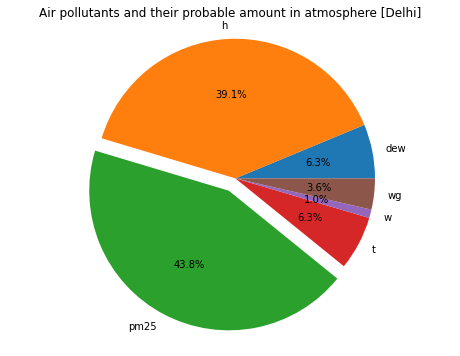

In [13]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(8,6))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%')

plt.title('Air pollutants and their probable amount in atmosphere [Delhi]')

plt.axis('equal')
plt.show()


#Plotting location on the map using cartopy

**Installing cartopy in colab**

In [14]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data is already the newest version (4.9.3-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [1]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.1.post1
Uninstalling Shapely-1.8.1.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.1.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.1.post1
  Using cached Shapely-1.8.1.post1.tar.gz (198 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665650 sha256=0180b8257ec0877637bd13ea78ed96596b362270a33d3dc21cae28ad78f67742
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, 

Plotting a map of the city

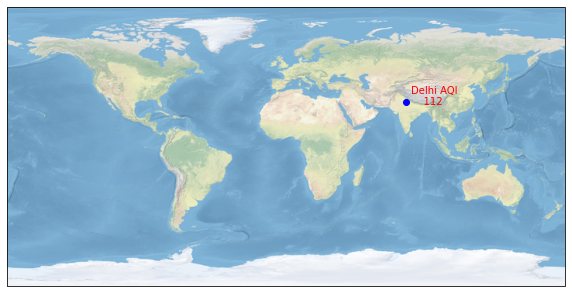

In [15]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()

# **Historical data analysis**

In [16]:
import pandas as pd

csv_path = '/content/drive/MyDrive/air pollution dataset/r.k.-puram, delhi, delhi, india-air-quality.csv'
df = pd.read_csv(csv_path)
df = df.head(50)
print(df)
df

         date  pm25  pm10   o3  no2  so2   co
0    2022/2/1   267   147   48   17    7   11
1    2022/2/2   229   131   23   13    6   11
2    2022/2/3   215    84   29   13    7    8
3    2022/2/4   146   157   31   17   10   12
4    2022/2/5   226   145   42   13    9   14
5    2022/2/6   231   160   41   22    6    8
6    2022/2/7   190   163   42   20    7   11
7    2022/2/8   213   127   25   18    8    6
8    2022/2/9   188   101   40   16    6    5
9   2022/2/10   159   113   48   20    8    5
10  2022/2/11   166   125   52   20    9    6
11  2022/2/12   179   150   47   17    7   10
12  2022/2/13   203   151   53   15    6   11
13  2022/2/14   199   136   52   18    6   11
14  2022/2/15   185   145   59   21    8   11
15  2022/2/16   200   151   44   22   11   10
16  2022/2/17   194   129   38   21    7    9
17  2022/2/18   170   109   51   20    8    4
18  2022/2/19   160   111   51   19    8    3
19  2022/2/20   165   125   48   19    9    7
20  2022/2/21   157   145   45   1

,date,pm25,pm10,o3,no2,so2,co
0,2022/2/1,267,147,48,17,7,11
1,2022/2/2,229,131,23,13,6,11
2,2022/2/3,215,84,29,13,7,8
3,2022/2/4,146,157,31,17,10,12
4,2022/2/5,226,145,42,13,9,14
5,2022/2/6,231,160,41,22,6,8
6,2022/2/7,190,163,42,20,7,11
7,2022/2/8,213,127,25,18,8,6
8,2022/2/9,188,101,40,16,6,5
9,2022/2/10,159,113,48,20,8,5


In [18]:
df.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [19]:
df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

In [20]:
df

,date,pm25,pm10,o3,no2,so2,co
0,2022/2/1,267,147,48,17,7,11
1,2022/2/2,229,131,23,13,6,11
2,2022/2/3,215,84,29,13,7,8
3,2022/2/4,146,157,31,17,10,12
4,2022/2/5,226,145,42,13,9,14
5,2022/2/6,231,160,41,22,6,8
6,2022/2/7,190,163,42,20,7,11
7,2022/2/8,213,127,25,18,8,6
8,2022/2/9,188,101,40,16,6,5
9,2022/2/10,159,113,48,20,8,5


Calculating Air pollution index after 11th Feb 2022

In [21]:
df['date'] = pd.to_datetime(df.date)

df21 = df.loc[df['date'] > '2022-02-11']
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10,o3,no2,so2,co
11,2022-02-12,179,150,47,17,7,10
12,2022-02-13,203,151,53,15,6,11
13,2022-02-14,199,136,52,18,6,11
14,2022-02-15,185,145,59,21,8,11
15,2022-02-16,200,151,44,22,11,10
16,2022-02-17,194,129,38,21,7,9
17,2022-02-18,170,109,51,20,8,4
18,2022-02-19,160,111,51,19,8,3
19,2022-02-20,165,125,48,19,9,7
20,2022-02-21,157,145,45,15,7,6


In [22]:
df21.drop(25, inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
11,2022-02-12,179,150,47,17,7,10
12,2022-02-13,203,151,53,15,6,11
13,2022-02-14,199,136,52,18,6,11
14,2022-02-15,185,145,59,21,8,11
15,2022-02-16,200,151,44,22,11,10
16,2022-02-17,194,129,38,21,7,9
17,2022-02-18,170,109,51,20,8,4
18,2022-02-19,160,111,51,19,8,3
19,2022-02-20,165,125,48,19,9,7
20,2022-02-21,157,145,45,15,7,6


Filling all the empty cells with 0

In [23]:
df21.replace(' ', '0', inplace=True)
df21

,date,pm25,pm10,o3,no2,so2,co
11,2022-02-12,179,150,47,17,7,10
12,2022-02-13,203,151,53,15,6,11
13,2022-02-14,199,136,52,18,6,11
14,2022-02-15,185,145,59,21,8,11
15,2022-02-16,200,151,44,22,11,10
16,2022-02-17,194,129,38,21,7,9
17,2022-02-18,170,109,51,20,8,4
18,2022-02-19,160,111,51,19,8,3
19,2022-02-20,165,125,48,19,9,7
20,2022-02-21,157,145,45,15,7,6


## **Plotting the data**

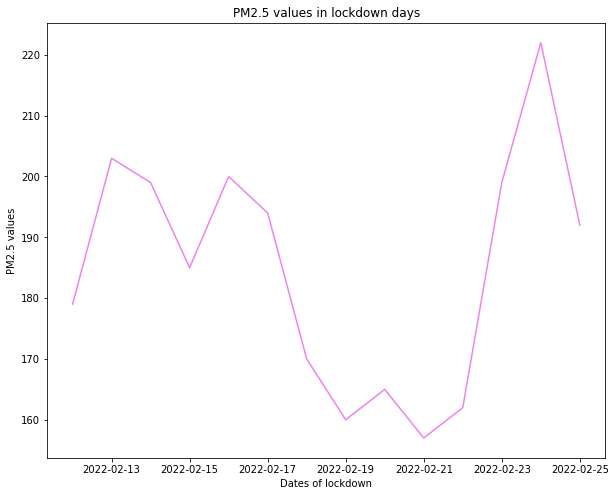

In [24]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25 = df21['pm25']
pm25 = [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates,pm25, color = 'Violet')
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

## **Extracting past days before lockdown**

In [32]:
## Duration of date must be same for comparison
mask = (df['date'] >= '2022-01-17') & (df['date']  < '2022-02-05')

past15 = df.loc[mask]
past15

,date,pm25,pm10,o3,no2,so2,co
0,2022-02-01,267,147,48,17,7,11
1,2022-02-02,229,131,23,13,6,11
2,2022-02-03,215,84,29,13,7,8
3,2022-02-04,146,157,31,17,10,12
40,2022-01-17,224,172,24,15,6,12
41,2022-01-18,260,210,27,19,7,16
42,2022-01-19,259,252,23,16,6,18
43,2022-01-20,318,195,32,17,7,21
44,2022-01-21,270,115,16,13,6,9
45,2022-01-22,202,125,17,10,7,18


# **Compairing the two**

In [30]:
## Duration of date must be same for comparison

<function matplotlib.pyplot.plot>

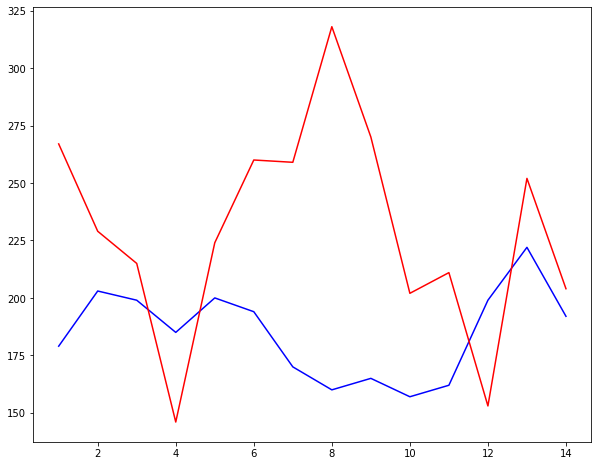

In [26]:
import matplotlib.pyplot as plt

dates = df21['date']
pm25_l = df21['pm25']
pm25_l = [int(i) for i in pm25]


pm25_n = past15['pm25']
pm25_n = [int(i) for i in pm25_n]

plt.figure(figsize=(10,8))

length = [i for i in range(1,len(dates)+1)]

plt.plot(length,pm25_l,color='blue',label='under lockdown')
plt.plot(length,pm25_n,color='red',label='before lockdown')
# plt.legend()
# plt.title('Comparision of before lockdown vs under lockdown pm2.5 values')
# plt.show()
plt.plot

# **Finding solutions to several questions**

## **1-  On which date pm2.5 value was minimum in Delhi under lockdown**

In [27]:
df21['pm25'] = [int(i) for i in df21['pm25']]
print(df21[df21.pm25 == df21.pm25.min()]) 

         date  pm25  pm10   o3  no2 so2  co
20 2022-02-21   157   145   45   15   7   6


# **2> On which date o3 value was maximum in Delhi under lockdown**

In [28]:
df21['o3'] = [int(i) for i in df21['o3']]
print(df21[df21.o3 == df21.o3.max()]) 

         date  pm25  pm10  o3  no2 so2   co
14 2022-02-15   185   145  59   21   8   11


# **3> What is the average value of so2 in the lockdown**

In [29]:
df21['so2'] = [int(i) for i in df21['so2']]
avgSo2 = df21['so2'].mean()
print('The average value of so2 :',avgSo2)

The average value of so2 : 7.428571428571429
